In [20]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
import pandas as pd

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np

In [46]:
knn = KNeighborsClassifier(n_neighbors=9)

In [47]:
df = pd.read_csv('../data/KNNAlgorithmDataset.csv')

In [48]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [49]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
        'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 
        'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].values

In [50]:
y = df['diagnosis'].values

In [51]:
print(X.shape, y.shape)

(569, 30) (569,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [54]:
print(knn.score(X_test, y_test)) 

0.9415204678362573


In [33]:
print(knn.score(X_train, y_train))

0.9472361809045227


In [34]:
train_accuracies = {}
test_accuracies = {}

In [40]:
neighbours = np.arange(1, 26)

In [41]:
for neighbour in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbour)
    knn.fit(X_train, y_train)
    train_accuracies[neighbour] = knn.score(X_train, y_train)
    test_accuracies[neighbour]= knn.score(X_test, y_test)

In [42]:
test_accuracies

{1: 0.9064327485380117,
 2: 0.9122807017543859,
 3: 0.9298245614035088,
 4: 0.935672514619883,
 5: 0.9415204678362573,
 6: 0.935672514619883,
 7: 0.9415204678362573,
 8: 0.9239766081871345,
 9: 0.9415204678362573,
 10: 0.9298245614035088,
 11: 0.9298245614035088,
 12: 0.9239766081871345,
 13: 0.935672514619883,
 14: 0.9415204678362573,
 15: 0.9415204678362573,
 16: 0.9415204678362573,
 17: 0.935672514619883,
 18: 0.9415204678362573,
 19: 0.935672514619883,
 20: 0.9415204678362573,
 21: 0.9415204678362573,
 22: 0.935672514619883,
 23: 0.935672514619883,
 24: 0.935672514619883,
 25: 0.935672514619883}

In [44]:
import matplotlib.pyplot as plt

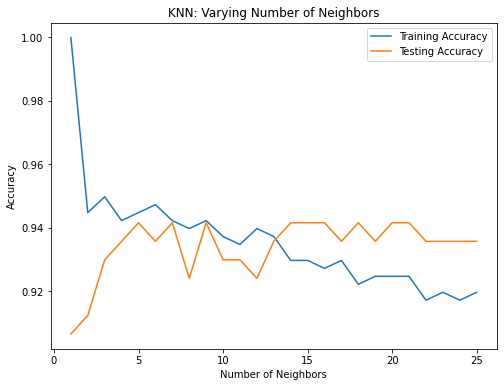

In [45]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()
